# Homework 2. GDP 와 삶의 만족도 데이터셋을 활용해 1차 선형 함수 모델 학습하기
### 과목코드: [2150085101]
### 팀명: [20202995 장진영]
### 팀장: [20201571 강현준]
### 팀원: [20201601 이시호]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#나눔 폰트 설치 코드
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 설치된 폰트를 확인합니다.
!fc-list :lang=ko

# matplotlib에 폰트를 설정합니다.

# matplotlib 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글이 깨지지 않도록 하기 위해서 minus 표시를 설정합니다.
plt.rcParams['axes.unicode_minus'] = False


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGo

#### 설명. 아래의 예제는 1주차에 학습한 국가별 1인 GDP 에 따른 삶의 만족도를 1차 선형 함수로 모델링한 결과이다.

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

np.random.seed(42)  # 난수 생성기의 초기값 설정 (재현성 보장)

font_path = '/content/drive/MyDrive/NanumGothic-Regular.ttf'  # 경로가 다를 경우 조정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family='NanumBarunGothic')
rc("axes", unicode_minus=False)


def prepare_country_stats(oecd_bli, gdp_per_capita, remove_indices = [0, 1, 6, 8, 33, 34, 35], scale=1e-5):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    keep_indices = list(set(range(36)) - set(remove_indices))

    country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

    country_stats["GDP per capita"] *= scale
    return country_stats

In [2]:
## 데이터 적재
oecd_bli = pd.read_csv("/content/drive/MyDrive/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("/content/drive/MyDrive/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [3]:
## 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

#### 아래의 그림의 1인당 GDP (100K $) 에 대한 삶의 만족도 를 시각화한 결과이다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49334 (\N{HANGUL SYLLABLE SALM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

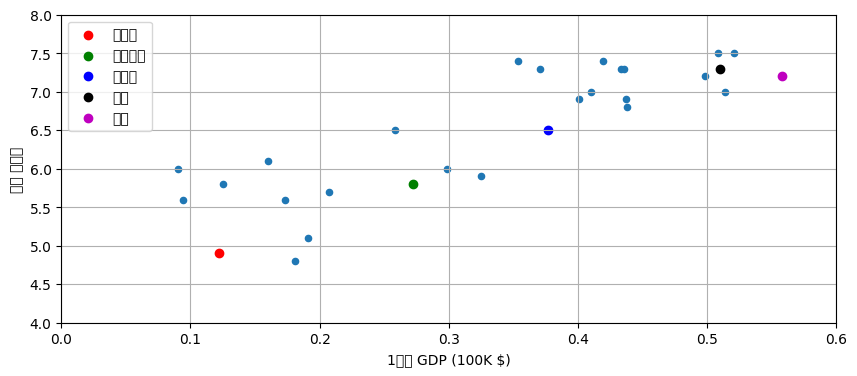

In [4]:
## 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(10, 4))
plt.scatter(country_stats['GDP per capita']['Hungary'],         country_stats["Life satisfaction"]['Hungary'],          c='r', label='헝가리')
plt.scatter(country_stats['GDP per capita']['Korea'],           country_stats["Life satisfaction"]['Korea'],            c='g', label='대한민국')
plt.scatter(country_stats['GDP per capita']['France'],          country_stats["Life satisfaction"]['France'],           c='b', label='프랑스')
plt.scatter(country_stats['GDP per capita']['Australia'],       country_stats["Life satisfaction"]['Australia'],        c='k', label='호주')
plt.scatter(country_stats['GDP per capita']['United States'],   country_stats["Life satisfaction"]['United States'],    c='m', label='미국')
plt.ylabel('삶의 만족도')
plt.xlabel('1인당 GDP (100K $)')
plt.ylim([4, 8])
plt.xlim([0, 0.6])
plt.grid()
plt.legend()
plt.show()


#### 이를 Linear Regression 모델을 이용하여 학습하면 아래와 같은 함수를 얻을 수 있다.

#### 삶의_만족도 = weight * 1인당_GDP + bias

In [8]:
## 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

## 모델 훈련
model.fit(X, Y)

weight = model.coef_[0, 0]  # 학습된 가중치 (weight)
bias = model.intercept_[0]  # 학습된 편향 (bias)

print(f'[학습된 모델] 삶의_만족도 = {weight:.2e} X 1인당_GDP + {bias:.2f}')

[학습된 모델] 삶의_만족도 = 4.91e+00 X 1인당_GDP + 4.85


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54749 (\N{HANGUL SYLLABLE HEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

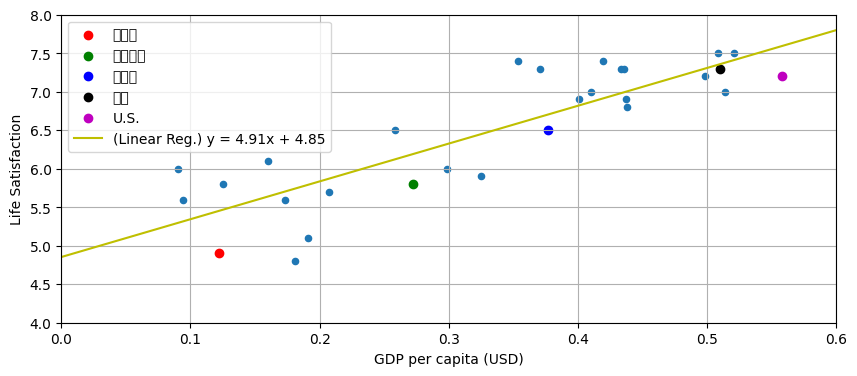

In [9]:
## 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(10, 4))

plt.scatter(country_stats['GDP per capita']['Hungary'],         country_stats["Life satisfaction"]['Hungary'],          c='r', label='헝가리')
plt.scatter(country_stats['GDP per capita']['Korea'],           country_stats["Life satisfaction"]['Korea'],            c='g', label='대한민국')
plt.scatter(country_stats['GDP per capita']['France'],          country_stats["Life satisfaction"]['France'],           c='b', label='프랑스')
plt.scatter(country_stats['GDP per capita']['Australia'],       country_stats["Life satisfaction"]['Australia'],        c='k', label='호주')
plt.scatter(country_stats['GDP per capita']['United States'],   country_stats["Life satisfaction"]['United States'],    c='m', label='U.S.')

plt.plot(np.linspace(0, 0.6),                                 weight*np.linspace(0, 0.6) + bias,                    'y',    label=rf'(Linear Reg.) y = {weight:.2f}x + {bias:.2f}')

plt.ylabel('Life Satisfaction')
plt.xlabel('GDP per capita (USD)')
plt.ylim([4, 8])
plt.xlim([0, 0.6])
plt.grid()
plt.legend()
plt.show()


#### 문제. 아래의 `코드`를 완성하고, 그에 대한 `분석`을 작성하시오.

1. (코드) 경사 하강법을 수행하기 위해, w 와 b 의 gradient 를 구하는 함수를 작성하시오.
   - (분석) 경사 하강법에 대해 설명하고, w 와 b 에 gradient 를 계산하시오.

In [ ]:
w = 1
b = 0
    # 기울기 계산
w_gradient = 2 * X * ((w * X + b - Y))
b_gradient = 2 *((w * X + b) - Y)
for i in range (0,29):
    print("w[",i,"],b[",i,"]",w_gradient[i],b_gradient[i])


#위의 표를 통하여 경사하강법의 추측된 함수는 y_pred = wX + b 형태임을 알 수 있습니다.
#이때 Loss 함수는 (y_pred - y)^2 = (wX + b - y)^2 의 형태입니다.
#w_gradient는 위 Loss 함수를 w에 대해 미분한값 이므로 2X(wX+b-y) 이고
#b_gradient는 위 Loss 함수를 b에 대해 미분한값 이므로 2(wX+b-y) 임을 알 수 있습니다.

2. (코드) 사용되는 변수들을 초기화 (initialization) 하시오.
   - (분석) 사용되는 변수들에 대해 설명하시오.

In [ ]:
w = 1  # 초기 가중치
b = 0  # 초기 절편
learning_rate = 0.01  #  Learning Rate
n_epochs = 100  # Epoch 횟수

#확률적 경사 하강법을 적용하기 위해서는 초기 가중치,편향,학습횟수,학습률을 정해야 하므로 해당 값을 부여하였습니다.


3. (코드) 확률적 경사 하강법 (Stocastic Gradient Descent Method) 를 이용하여, 1차원 선형 함수를 학습하시오.
   - (분석) 상세히 주석을 작성하시오.

In [ ]:
lst_w = []
lst_b = []
lst_loss = []

lst_w.append(w)
lst_b.append(b)

random_index = list(range(len(X)))

print(f"Epoch = 0")
print(f"w = {w:.4f}, b = {b:.4f}")

# Stochastic Gradient Descent (SGD) 수행
for epoch in range(n_epochs):  # 각 epoch 반복
    np.random.shuffle(random_index)
    for i in random_index:  # 각 데이터 포인트에 대해 반복

        # 데이터 불러오기
        x = X[i][0]
        y = Y[i][0]

        y_pred = w * x + b

        # Loss 계산
        loss = (y - y_pred) ** 2

        # Gradient 계산
        dw = -2 * x * (y - y_pred)
        db = -2 * (y - y_pred)

        # 파라미터 업데이트
        w -= learning_rate * dw
        b -= learning_rate * db

        # 파라메터 누적하기
        lst_w.append(w)
        lst_b.append(b)
        lst_loss.append(loss)

    print(f"Epoch = {epoch+1}")
    print(f"w = {w:.4f}, b = {b:.4f}")

#### (수정하지 마시오.) 결과 출력

In [ ]:
plt.plot(lst_loss, label='MSE loss')
plt.legend()
plt.grid()
plt.xlim([0, n_epochs])
plt.title('Learning Curve')
plt.xlabel('Number of epochs')
plt.ylabel('MSE losses')
plt.show()

plt.plot(lst_w, label='weight: w')
plt.plot(lst_b, label='bias: b')
plt.legend()
plt.grid()
plt.xlim([0, n_epochs])
plt.title('$y = wx + b$')
plt.xlabel('Number of epochs')
plt.ylabel('Values')
plt.show()


In [ ]:
## 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(10, 4))

plt.scatter(country_stats['GDP per capita']['Hungary'],         country_stats["Life satisfaction"]['Hungary'],          c='r', label='헝가리')
plt.scatter(country_stats['GDP per capita']['Korea'],           country_stats["Life satisfaction"]['Korea'],            c='g', label='대한민국')
plt.scatter(country_stats['GDP per capita']['France'],          country_stats["Life satisfaction"]['France'],           c='b', label='프랑스')
plt.scatter(country_stats['GDP per capita']['Australia'],       country_stats["Life satisfaction"]['Australia'],        c='k', label='호주')
plt.scatter(country_stats['GDP per capita']['United States'],   country_stats["Life satisfaction"]['United States'],    c='m', label='U.S.')

plt.plot(np.linspace(0, 0.6),                                 weight*np.linspace(0, 0.6) + bias,                    'y',    label=rf'(Linear Reg.) y = {weight:.2f}x + {bias:.2f}')
plt.plot(np.linspace(0, 0.6),                                 w*np.linspace(0, 0.6) + b,                            'k--',  label=rf'(GD Method) y = {w:.2f}x + {b:.2f}')

plt.ylabel('Life Satisfaction')
plt.xlabel('GDP per capita (100K $)')
plt.ylim([4, 8])
plt.xlim([0, 0.6])
plt.grid()
plt.legend()
plt.show()


4. (코드) weight 와 bias 의 초기값, epoch 의 횟수, 그리고 학습률 (learning rate) 등을 변경해가며 위의 결과 출력을 수행하시오.
   - (분석) weight 와 bias 의 초기값, epoch 의 횟수, 그리고 학습률 (learning rate) 등이 달라짐에 따라, 어떤 변화가 있는 관측하고 분석하시오.

1. Weight Weight의 초기값을 1에서 Linear Regression 모델로 구한 4.91 까지 10개의 Step으로 나누어 점차 증가시켜보았다.


In [ ]:
b = 0  # 초기 절편
learning_rate = 0.1 # Learning Rate
n_epochs = 100  # Epoch 횟수
lst_loss = []

# Plot 생성
plt.figure(figsize=(10, 6))

# Weight를 1부터 10까지 변경하면서 실험
for initial_w in range(1,11):
    # 초기 Weight 설정
    w = initial_w

    # reset
    lst_w = []
    lst_b = []
    lst_loss = []

    # 초기값 삽입
    lst_w.append(w)
    lst_b.append(b)

    # Stochastic Gradient Descent (SGD) 수행
    random_index = list(range(len(X)))
    for epoch in range(n_epochs):
        np.random.shuffle(random_index)
        for i in random_index:
            # 데이터 불러오기
            x = X[i][0]
            y = Y[i][0]

            y_pred = w * x + b

            # 손실(loss) 계산
            loss = (y - y_pred) ** 2

            # Gradient 계산
            dw = -2 * x * (y - y_pred)
            db = -2 * (y - y_pred)

            # 파라미터 업데이트 및 lst 추가
            w -= learning_rate * dw
            b -= learning_rate * db

            lst_w.append(w)
            lst_b.append(b)
            lst_loss.append(loss)

    # 최종 모델 그래프 추가
    x_vals = np.linspace(0, 0.6)  # x 범위
    y_vals = w * x_vals + b
    plt.plot(x_vals, y_vals, label=f'w 초기값={initial_w}, 결과: y={w:.2f}x + {b:.2f}')

# 원본 데이터 산점도
plt.scatter(X, Y, color='black', label="Data Points")

# 그래프 설정
plt.xlabel("GDP per capita (100K $)")
plt.ylabel("Life Satisfaction")
plt.xlim([0, 0.6])
plt.ylim([4, 8])
plt.title("Weight의 Initial 값이 SGD 모델의 결과에 미치는 영향")
plt.legend()
plt.grid()
plt.show()

#같은 조건에서 Learning Rate를 변경


In [ ]:
b = 0  # 초기 절편
learning_rate = 0.02 # Learning Rate
n_epochs = 100  # Epoch 횟수
lst_loss = []

# Plot 생성
plt.figure(figsize=(10, 6))

# Weight를 1부터 10까지 변경하면서 실험
for initial_w in range(1,11):
    # 초기 Weight 설정
    w = initial_w

    # reset
    lst_w = []
    lst_b = []
    lst_loss = []

    # 초기값 삽입
    lst_w.append(w)
    lst_b.append(b)

    # Stochastic Gradient Descent (SGD) 수행
    random_index = list(range(len(X)))
    for epoch in range(n_epochs):
        np.random.shuffle(random_index)
        for i in random_index:
            # 데이터 불러오기
            x = X[i][0]
            y = Y[i][0]

            y_pred = w * x + b

            # 손실(loss) 계산
            loss = (y - y_pred) ** 2

            # Gradient 계산
            dw = -2 * x * (y - y_pred)
            db = -2 * (y - y_pred)

            # 파라미터 업데이트 및 lst 추가
            w -= learning_rate * dw
            b -= learning_rate * db

            lst_w.append(w)
            lst_b.append(b)
            lst_loss.append(loss)

    # 최종 모델 그래프 추가
    x_vals = np.linspace(0, 0.6)  # x 범위
    y_vals = w * x_vals + b
    plt.plot(x_vals, y_vals, label=f'w 초기값={initial_w}, 결과: y={w:.2f}x + {b:.2f}')

# 원본 데이터 산점도
plt.scatter(X, Y, color='black', label="Data Points")

# 그래프 설정
plt.xlabel("GDP per capita (100K $)")
plt.ylabel("Life Satisfaction")
plt.xlim([0, 0.6])
plt.ylim([4, 8])
plt.title("Weight의 Initial 값이 SGD 모델의 결과에 미치는 영향")
plt.legend()
plt.grid()
plt.show()

#Weight의 초기값은 결과에 큰 영향을 주는 것 같지는 않음.

#그러나 같은 조건에서 Learning Rate를 변경한 결과 Weight의 초기값이 커질수록 결과값의 기울기가 더 커지는 경향이 있음. 그만큼 Bias가 낮아져 Data point가 있는 부분에는 비슷한 결과를 보여줌.
#따라서 실험 전 적절한 Weight, Bias, Epoch를 찾고 그 다음 진행할 필요성을 느낌.